# Métodos de Regressão Linear:

$$ S_{xx} = \sum x^2 -  \frac{(\sum x)^2}n = \sum (x_i - \overline{x})^2 = (n-1) \cdot Var(x)$$

$$ S_{yy} = \sum y^2 -  \frac{(\sum y)^2}n = \sum (y_i - \overline{y}) = (n-1) \cdot Var(y)^2$$

$$ S_{xy} = \sum x \cdot y -  \frac{(\sum x) \cdot (\sum y)}n = \sum (x_i - \overline{x}) \cdot (y_i - \overline{y}) = (n-1) \cdot Cov(x,y)$$

$$ \beta_1 = \frac{n \cdot \sum x \cdot y -  \sum x \cdot \sum y}{n \cdot \sum x^2 - (\sum x)^2} = \frac{S_{xy}}{S_{xx}} = \frac{Cov(x,y)}{Var(x)} = \frac{Cov(x,y)}{{\sigma_x}^2}$$

$$\beta_0 = \overline y - \beta_1 \cdot \overline x$$

$$ SQT = \sum (y - \overline{y})^2 = S_{yy}\text{ : Soma dos quadrados totais}$$
$$ SQR = \sum (\hat y - \overline{y})^2 \text{ : Soma dos quadrados da regressão - Variação Explicada}$$
$$ SQE = \sum (y - \hat{y})^2 \text{ : Soma dos quadrados dos Erros - Variação Não Explicada}$$

$$ SQT = SQR + SQE $$

$$ \boxed{R^2 = \frac{SQR}{SQT} = \frac{\sum (\hat y - \overline{y})}{\sum (y - \overline{y})}} $$

Demosntração de $SQT = SQR + SQE$ :

$$ SQR = \sum (\hat y - \overline{y})^2 = \sum (\beta_1 \cdot x + \beta_0 - \overline{y})^2$$

Como $\beta_0 = \overline y - \beta_1 \cdot \overline x$:


$$ SQR = \sum (\beta_1 \cdot x +  \color{red} {\overline y} - \beta_1 \cdot \overline x - \color{red}{\overline{y}})^2 =
\sum (\beta_1 \cdot x - \beta_1 \cdot \overline x)^2 = {\beta_1}^2\cdot\sum (x - \overline x)^2 = {\beta_1}^2\cdot S{xx}$$

$$ \boxed{SQR = {\beta_1}^2\cdot S{xx} = \frac{{S_{xy}}^2}{S_{xx}}}$$

$$ SQE = \sum (y - \hat{y})^2 = \sum (y - \beta_1 \cdot x + \beta_0)^2 = \sum (y - \beta_1 \cdot x - \overline y + \beta_1 \cdot \overline x)^2$$

$$ SQE = \sum [(y - \overline y) - \beta_1 \cdot( x  - \overline x)]^2 = \sum [(y - \overline y)^2 - 2 \cdot \beta_1 \cdot (y - \overline y) \cdot ( x  - \overline x) +(\beta_1 \cdot( x  - \overline x))^2]$$

$$ SQE = S_{yy} - 2 \cdot \frac{S_{xy}}{S_{xx}} \cdot S_{xy} + SQR = SQT - SQR$$

Logo:

$$ R^2 = \frac{{S_{xy}}^2}{S_{xx} \cdot S_{yy}} = \frac{\beta_1 \cdot S_{xy}}{S_{yy}}$$

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation

n = 300
a = 3
b = 2

x = [rnd.randint(1,500) for k in range(n)]
y = list(map(lambda x: a*x + b + rnd.gauss(0,n/2),x))

xm = np.mean(x)
ym = np.mean(y)

In [2]:
Soma_x2 = sum(map(lambda x: x**2,x))
Soma_y2 = sum(map(lambda x: x**2,y))
Soma_xy = sum(map((lambda x,y: x*y),x,y))

In [3]:
Sxx_1 = sum(map(lambda x: (x - xm)**2,x))
Sxx_2 = Soma_x2 - sum(x)**2/n
Sxx_1,Sxx_2,(n-1)*np.var(x,ddof=1)

(6959662.196666666, 6959662.196666665, 6959662.196666667)

In [4]:
Syy_1 = sum(map(lambda x: (x - ym)**2,y))
Syy_2 = Soma_y2 - sum(y)**2/n
Syy_1,Syy_2,(n-1)*np.var(y,ddof=1)

(70640795.0527411, 70640795.05274129, 70640795.0527411)

In [5]:
Sxy_1 = sum(map(lambda x,y: (x - xm)*(y - ym),x,y))
Sxy_2 = Soma_xy - sum(x)*sum(y)/n
Sxy_1,Sxy_2, (n-1)*np.cov(x,y,ddof=1)

(21029062.132723134,
 21029062.132723227,
 array([[ 6959662.19666667, 21029062.13272311],
        [21029062.13272311, 70640795.0527411 ]]))

In [6]:
beta1 = Sxy_1/Sxx_1 
beta1

3.021563624567154

In [7]:
beta0 = ym - beta1*xm
beta0

9.889004346932666

In [15]:
yhat = list(map(lambda x: beta0 + beta1*x, x))

u_erro = list(map(lambda a,b:a-b,y,yhat))

cov_xu = list(map(lambda a,b:a*b,x,u_erro))

## Propriedades :

O Somatório dos erros amostrais e sua média é igual a 0

$$ \sum \hat u_i = 0 \text{ ou } \sum  \frac{\hat u_i}{n}$$

A Covariância entre $x$ e $u$ é igual a 0:
$$ \sum x_i \cdot \hat u_i = 0 \Rightarrow \text{ O Somatório dos erros é igual a 0} $$

In [18]:
soma_erro = sum(u_erro)
soma_cov_xu = sum(cov_xu)
print(f'{soma_erro:.3f},{soma_cov_xu:.3f}')

0.000,-0.000


In [21]:
cov_yu = list(map(lambda a,b:a*b,y,u_erro))
sum(cov_yu)

7100145.853742383

In [22]:
cov_yhu = list(map(lambda a,b:a*b,yhat,u_erro))
sum(cov_yhu)

-6.047775968909264e-08

In [10]:
r2_1 = np.corrcoef(x, y)[0,1]**2
r2_2 = Sxy_1**2/(Sxx_1*Syy_1)
r2_3 = beta1*Sxy_1/(Syy_1)

r2_1,r2_2,r2_3

(0.8994894402244282, 0.8994894402244304, 0.8994894402244304)

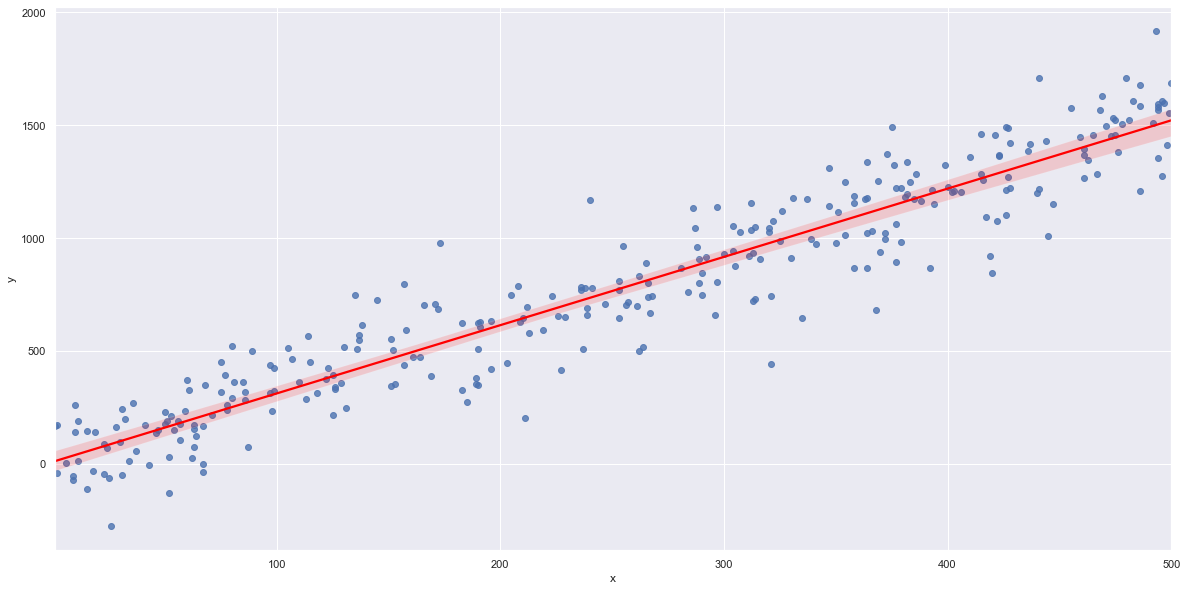

In [11]:
f = plt.figure(figsize=(20, 10))

df = pd.DataFrame([x,y]).T
df.columns = ['x','y']

sns.set_theme(color_codes=True)

ax = sns.regplot(x="x", y="y", data=df,line_kws={"color": "red"},ci = 99.95)

– A presença  de  heteroscedasticidade  não  causa viés  ou inconsistência  nos estimadores  MQO.<br>
– A omissão  de  uma variável  importante pode  causar correlação  entre o  erro  e variáveis  explicativas,  o  que  pode gerar viés e inconsistência  em estimadores  MQO.<br>

– Se a variável omitida representa uma causa para X e também para Y, então, sua omissão deverá resultar numa correlação espúria, uma estimação inviesada do efeito causal β.


<IPython.core.display.Javascript object>


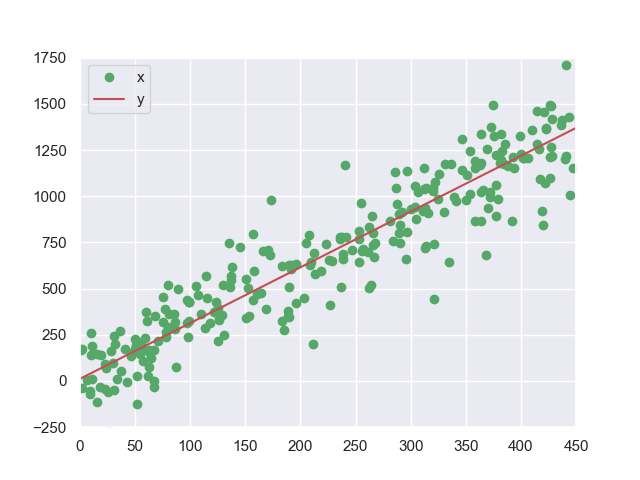

In [19]:
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

x,y = np.array(x), np.array(y)

x_data = []
y_data = []

fig, ax = plt.subplots()     # A tuple unpacking to unpack the only fig
ax.set_xlim(0, 450)
ax.set_ylim(-250, 1750)
# Plotting 
scatter, = ax.plot([], [], 'go', label='x')
line, = ax.plot([], [], 'r', label='y')
ax.legend()

reg = LinearRegression()

def animate(frame_num):
    # Adding data
    x_data.append(x[frame_num])
    y_data.append(y[frame_num])
    # Convert data to numpy array
    x_train = np.array(x_data).reshape(-1, 1)
    y_train = np.array(y_data).reshape(-1, 1)
    # Fit values to a linear regression
    reg.fit(x_train, y_train)

    # update data for scatter plot
    scatter.set_data((x_data, y_data))
    # Predict value and update data for line plot
    line.set_data((list(range(500)), reg.predict(np.array([entry for entry in range(500)]).reshape(-1, 1))))

anim = FuncAnimation(fig, animate, frames=len(x), interval=20)
plt.show()